# Prediction Analysis for Student Retention Rates

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

from tools.utils import filtered_df_two_columns, pearson_corr_coef, prediction_analysis, regression_analysis_results, calculate_MSE

Given the preliminary feature analysis conducted in the `EDA.ipynb`, we have found that the following variables affect retention rates.

* Four-year retention rates
    - `SAT_AVG`: Average SAT equivalent score of students admitted
    - `AVGFASCAL`: Average faculty salary
    - `PAR_ED_PCT_HS` : Percent of students whose parents' highest educational level is high school
    - `PAR_ED_PCT_PS`: Percent of students whose parents' highest educational level was is some form of postsecondary education
    
* Less-than-four-year retention rates
    - `Ethnic Diversity (UGDS)` : Total share of enrollment of undergraduate degree-seeking students who are [specific race]
    - `CCUGPROF` : Carnegie Classification -- undergraduate profile

Now, we are going to conduct further analysis including linear regression in order to explore the true relationship between these features and retention rates. 

## Loading in Data

In [45]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")
data = data.drop('Unnamed: 0', axis=1)

## Four-Year Retention Rates

### SAT_AVG

In [46]:
FT4_institutions = data[data['RET_FT4'].notnull()][['RET_FT4', 'SAT_AVG']]
FTL4_institutions = data[data['RET_FTL4'].notnull()][['RET_FTL4', 'SAT_AVG']]

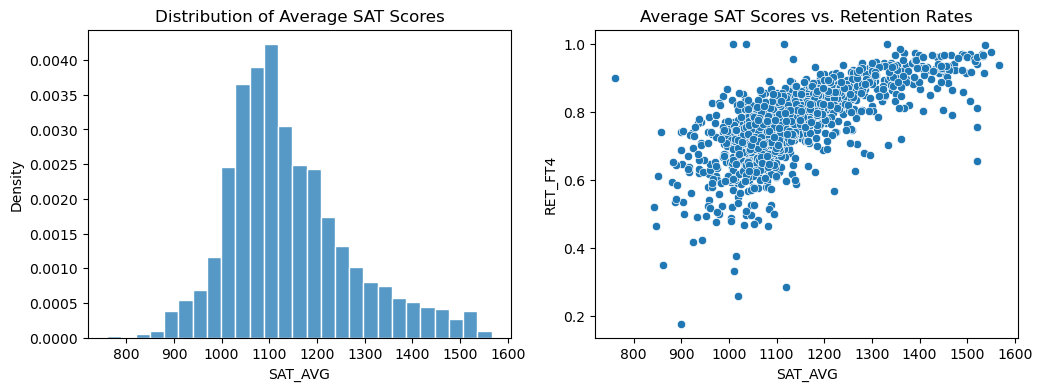

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=FT4_institutions, x='SAT_AVG', edgecolor='white', stat='density', ax=ax1)
ax1.set_title('Distribution of Average SAT Scores')
sns.scatterplot(data=FT4_institutions, x='SAT_AVG', y='RET_FT4', ax=ax2)
ax2.set_title('Average SAT Scores vs. Retention Rates')
plt.savefig('figures/SAT_AVG_VS_RET_FT4.png');

The average SAT score for four year institutions is around 1100. There is a positive relationship between average SAT score and retention rate. In other words, as the average SAT scores increase, the retention rate also increases.

In [48]:
SAT_score_FT4 = filtered_df_two_columns(data, 'SAT_AVG', 'RET_FT4')
SAT_score_FT4.head()

,SAT_AVG,RET_FT4
0,959.0,0.5403
1,1245.0,0.8640
3,1300.0,0.8180
4,938.0,0.6202
5,1262.0,0.8723


In [49]:
pearson_corr_coef(SAT_score_FT4.SAT_AVG, SAT_score_FT4.RET_FT4)

array([[1.20105587e+03, 6.97777529e-01],
       [6.97777529e-01, 8.34092182e-04]])

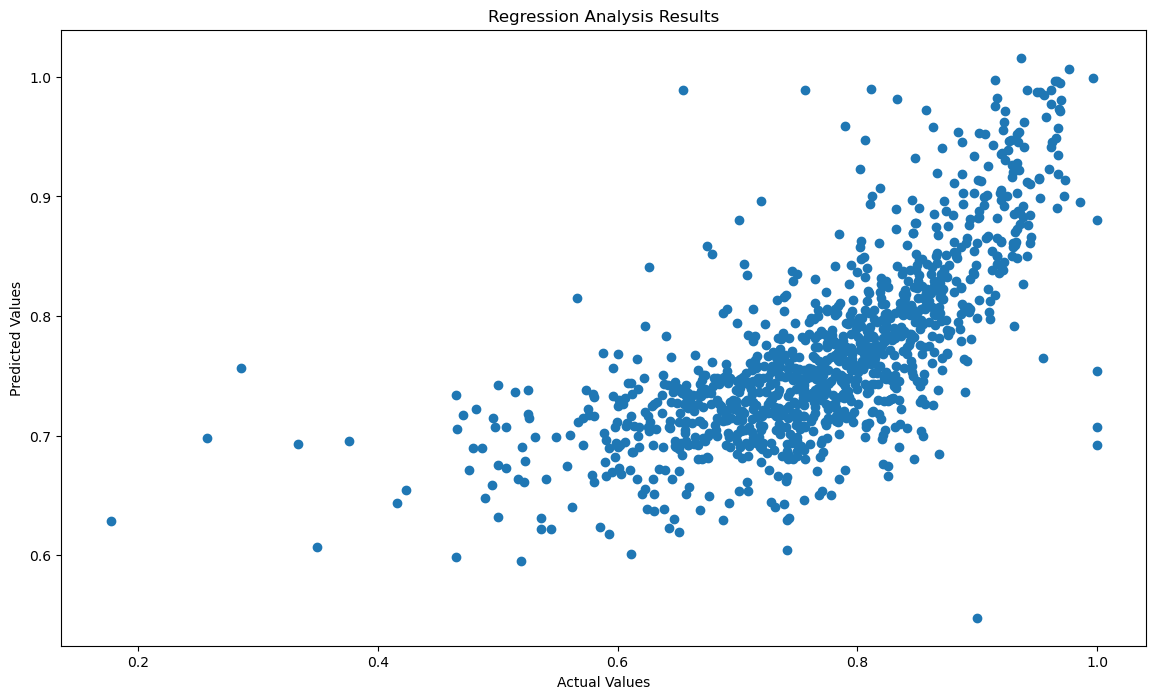

0.4860228610596219

<Figure size 1400x800 with 0 Axes>

In [50]:
regression_analysis_results(SAT_score_FT4.RET_FT4, prediction_analysis(SAT_score_FT4), 'SATactual_vs_SATpredicted.png')

In [51]:
calculate_MSE(SAT_score_FT4.RET_FT4, prediction_analysis(SAT_score_FT4))

0.017792116415510515

### AVGFACSAL

In [52]:
AVGFACSAL_FT4 = filtered_df_two_columns(data, 'AVGFACSAL', 'RET_FT4')
AVGFACSAL_FT4.head()

,AVGFACSAL,RET_FT4
0,7599.0,0.5403
1,11380.0,0.8640
2,4545.0,0.5000
3,9697.0,0.8180
4,7194.0,0.6202


In [53]:
pearson_corr_coef(AVGFACSAL_FT4.AVGFACSAL, AVGFACSAL_FT4.RET_FT4)

array([[1.66224401e+04, 3.66145436e-01],
       [3.66145436e-01, 6.02185469e-05]])

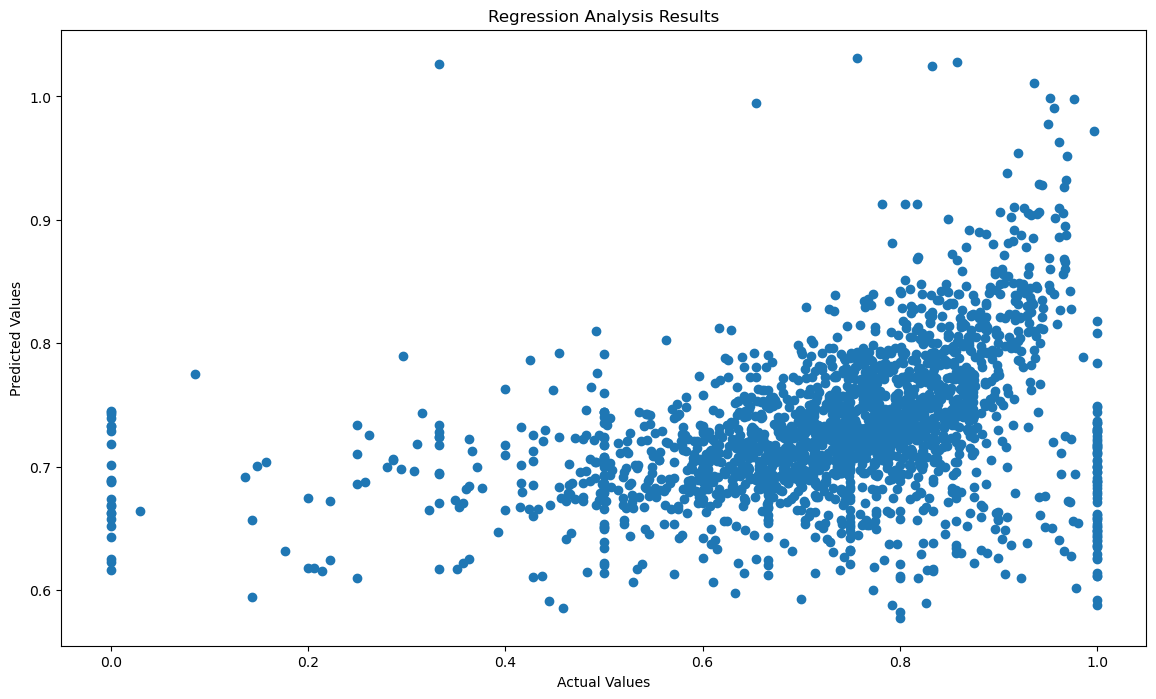

0.1339313356752908

<Figure size 1400x800 with 0 Axes>

In [54]:
regression_analysis_results(AVGFACSAL_FT4.RET_FT4, prediction_analysis(AVGFACSAL_FT4), 'AVGFACSALactual_vs_AVGFACSALpredicted.png')

In [55]:
calculate_MSE(AVGFACSAL_FT4.RET_FT4, prediction_analysis(AVGFACSAL_FT4))

0.03094448077224073

### PAR_ED_PCT_HS and PAR_ED_PCT_PS

## Less-than-four-year Retention Rates

### Racial and Ethnic Diversity Analysis

In [56]:
race_columns = ['UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
                'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN']
data[race_columns]

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,0.0159,0.9022,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440
1,0.5496,0.2401,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059
2,0.2550,0.6913,0.0268,0.0034,0.0000,0.0000,0.0000,0.0000,0.0235
3,0.7173,0.0907,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252
4,0.0167,0.9265,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111
...,...,...,...,...,...,...,...,...,...
6676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These columns provide information on the racial and ethnic diversity of undergraduate, degree-seeking students in a particular institutions. 

* white (UGDS_WHITE)

* black (UGDS_BLACK)

* Hispanic (UGDS_HISP)

* Asian (UGDS_ASIAN)

* American Indian/Alaska Native (UGDS_AIAN)

* Native Hawaiian/Pacific Islander (UGDS_NHPI)

* two or more races (UGDS_2MOR)

* non-resident aliens (UGDS_NRA)

* unknown (UGDS_UNKN)

We will be using the **Simpson's Diversity Index** to describe the Racial and Ethnic diversity of professions schools in the United States. 

$$1 - \sum_{i=1}^{n} p_i^2$$ 

In [57]:
data['diversity_index'] = 1 - data[race_columns].apply(lambda row: row**2, axis=1).sum(axis=1)
data['diversity_index']

0       0.183444
1       0.628836
2       0.455797
3       0.469490
4       0.140635
          ...   
6676    1.000000
6677    1.000000
6678    1.000000
6679    1.000000
6680    1.000000
Name: diversity_index, Length: 6681, dtype: float64

In [58]:
FT4_institutions = data[data['RET_FT4'].notnull()][['RET_FT4', 'diversity_index']]
FTL4_institutions = data[data['RET_FTL4'].notnull()][['RET_FTL4', 'diversity_index']]

In [59]:
FT4_institutions.head()

,RET_FT4,diversity_index
0,0.5403,0.183444
1,0.8640,0.628836
2,0.5000,0.455797
3,0.8180,0.469490
4,0.6202,0.140635


In [60]:
FTL4_institutions.head()

,RET_FTL4,diversity_index
6,0.5915,0.430426
11,0.5538,0.661073
13,0.5961,0.588972
14,0.5449,0.527717
16,0.5357,0.478832


### Comparing the Diversity and Retention Rates between four-year and less-than-four-year institution

In [61]:
# four-year institutions
print(FT4_institutions['RET_FT4'].mean(), FT4_institutions['diversity_index'].mean())

0.730971298076923 0.5035307974807692


In [62]:
# less-than-four-year institutions
print(FTL4_institutions['RET_FTL4'].mean(), FTL4_institutions['diversity_index'].mean())

0.6909051969012266 0.47995730161071665


#### Four-year institutions

When you have two massive continuous data and you want to visualize their relationship, you can use a scatter plot. Scatter plots are useful for visualizing the relationship between two continuous variables. Each data point is plotted as a point on the graph, with one variable on the x-axis and the other on the y-axis.

However, if you have a large number of data points, a scatter plot can become overcrowded and difficult to interpret. In such cases, you can use a 2D density plot. These plots provide a way to visualize the distribution of the data while reducing the clutter caused by overlapping points in a scatter plot. A 2D density plot creates a smoothed representation of the data by estimating the density of points in different regions of the plot.

* $H_0:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

In [63]:
corr, p_value = stats.pearsonr(FT4_institutions['diversity_index'], FT4_institutions['RET_FT4'])
print(corr, p_value)

-0.012020871881703171 0.583742479083747


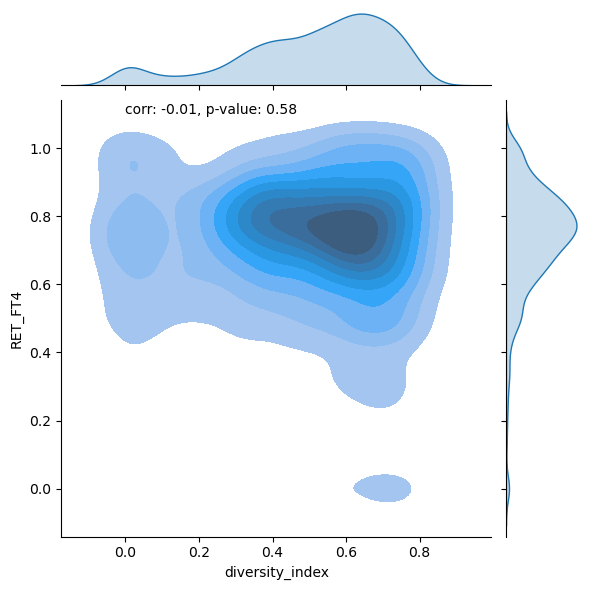

In [64]:
f = sns.jointplot(data=FT4_institutions, x='diversity_index', y='RET_FT4', kind='kde', fill='b')
f.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2f}', xy=(0,1.1))
plt.savefig('figures/RET_FT4_diversity.png');

**The p-value is around 0.58, which is very large. This means that we can conclude that there is no relationship between retention rate and diversity index at four-year institutions.**

#### Less than four-year institutions

* $H_0:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

In [65]:
corr, p_value = stats.pearsonr(FTL4_institutions['diversity_index'], FTL4_institutions['RET_FTL4'])
print(corr, p_value)

-0.08259689032835084 4.15791895176101e-06


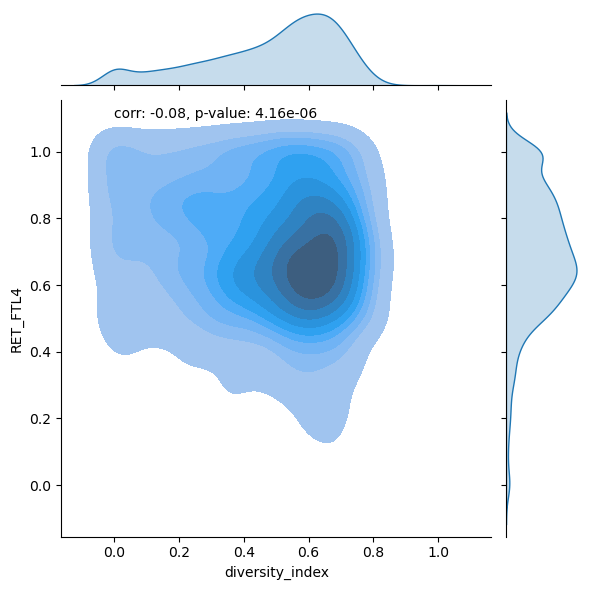

In [66]:
g = sns.jointplot(data=FTL4_institutions, x='diversity_index', y='RET_FTL4', kind='kde', fill='b')
g.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2e}', xy=(0,1.1))
plt.savefig('figures/RET_FTL4_diversity.png');

**The p-value is very small. This means that we can conclude that there is a relationship between retention rate and diversity index at less-than-four-year institutions. The correlation between diversity index and retention rate is negative. Therefore, we can conclude that as diversity index increases, the retention rate for less-than-four-year institution decreases.**

### CCUGPROF

In [67]:
CCUG_FTL4 = filtered_df_two_columns(data, 'CCUGPROF', 'RET_FTL4')
CCUG_FTL4.head()

,CCUGPROF,RET_FTL4
6,2.0,0.5915
11,2.0,0.5538
13,2.0,0.5961
14,2.0,0.5449
16,2.0,0.5357


In [68]:
pearson_corr_coef(CCUG_FTL4.CCUGPROF, CCUG_FTL4.RET_FTL4)

array([[11.06490256, -0.27930278],
       [-0.27930278,  0.09043423]])

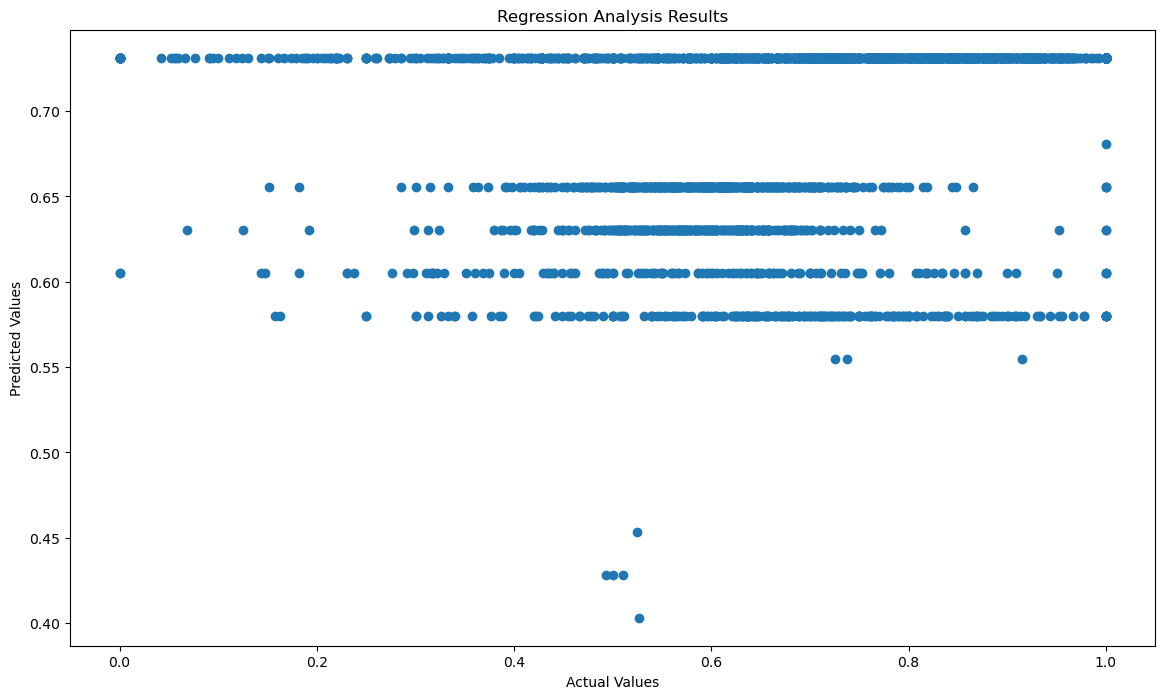

0.07795969145423698

<Figure size 1400x800 with 0 Axes>

In [69]:
regression_analysis_results(CCUG_FTL4.RET_FTL4, prediction_analysis(CCUG_FTL4), 'CCUGPROFactual_vs_CCUGPROFpredicted.png')

In [70]:
calculate_MSE(CCUG_FTL4.RET_FTL4, prediction_analysis(CCUG_FTL4))

0.04143792812705519